# Exercises for Session 14: Text as Data

In session 14 you will learn how to preprocess text data and structure it, so we can exploit the information in the texts. 

You will work on a larger exercise where you will use the tools you learn. In the exercise you will use the logistic regression model, which is fitted on the movie review dataset in the slides to predict sentiments on a completely different dataset: 

- The dataset contains tweets about US airlines. You can read more about it here: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment?resource=download
- Each tweet has been classified as positive, negative or neutral, which makes it possible for us to compare the predictions from our logistic regression model with the actual sentiments.

The purpose of this exercise is to learn the pitfalls of fitting a model to one kind of text data, and then use the model to predict sentiments of another kind of text data (*cross-domain evaluation*). I.e., we will investigate how *generalizable* our model is.

- Spoiler: The words in the tweets convey a completely different meaning than the words in the movie reviews, so our movie review logistic regression model is not good at predicting sentiments in tweets.

### Fitting the logistic regression model on the movie review data

Before we can get started, you need to run the code below that fits a logistic regression model on the movie review data.

We will then use that model to predict sentiments in the twitter data.

In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Import data
df = pd.read_csv('movie_data.csv', encoding='utf-8', sep=';')

# Clean reviews
def cleaner(document):
    document = document.lower() #To lower case
    document = re.sub(r'<[^>]*>', ' ', document) #Remove HTML
    document = re.sub(r'[^\w\s]','', document) #Remove non-alphanumeric characters
    return document

df['review'] = df['review'].apply(cleaner)

# Load train and test sets to different dataframes
df_train = df[df.set=="train"]
df_test = df[df.set=="test"]

# Sort the data randomly to mix positive and negative reviews
np.random.seed(0)
df_train = df.reindex(np.random.permutation(df_train.index))
df_test = df.reindex(np.random.permutation(df_test.index))

# Take out X and Y variable
x_train = df_train['review'].values
x_test = df_test['review'].values
y_train = df_train['sentiment'].values
y_test = df_test['sentiment'].values

# Make our bag of words
tfidf = TfidfVectorizer()
x_train_bag = tfidf.fit_transform(x_train)

# Fit the model
lr_reviews = LogisticRegression(random_state=0) #Text classifier
lr_reviews.fit(x_train_bag,y_train)

LogisticRegression(random_state=0)

# Part 1: Cross-domain evaluation of a logistic regression model fitted on movie review data

First load the twitter data, which you can find on github under module 14:

In [2]:
tweet_df = pd.read_csv("AirlineTweets.csv")

Second, change the sentiment to "positive" if the sentiment is labelled "neutral" to have only two categories. In the same time store the sentiments in a list for later use:

In [3]:
tweet_sentiments = [0 if i=="negative" else 1 for i in tweet_df.airline_sentiment]

Remember to watch the video below before moving on to the exercise:

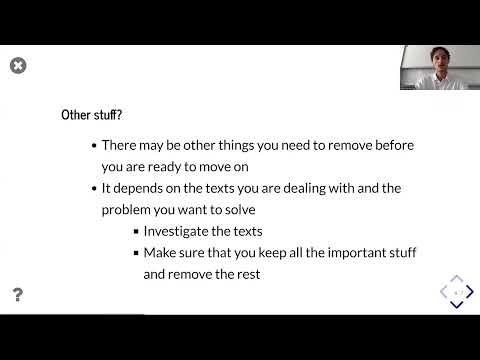

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('piawPVa2Zjk', width=640, height=360)

> **Ex. 14.1.1:** Preprocess the twitter texts. You should at least do the following:
> - Make all letters lower case
> - Remove mentions; i.e. "@user". You can do this with regex.
> - Can you think of other things to clean? Take a look at some of the tweets to look for other unnecessary stuff.

In [5]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [6]:
### BEGIN SOLUTION
def cleaner(document):
    document = document.lower() #To lower case
    document = re.sub(r'@\w+','', document) #Remove mentions
    return document

tweet_df['text'] = tweet_df['text'].apply(cleaner)
### END SOLUTION

Remember to watch the video below before moving on to the next exercise:

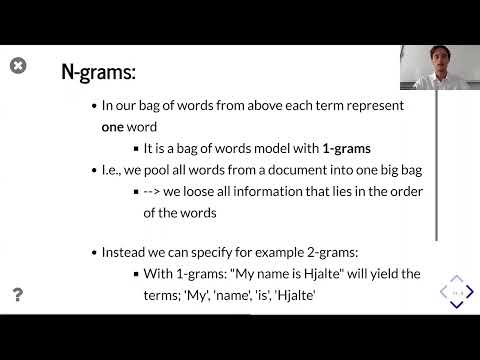

In [7]:
YouTubeVideo('UtyYHIDwN8A', width=640, height=360)

> **Ex. 14.1.2:** Make your bag of words from the tweets using the tf-idf vectorizer ("tfidf") previously fitted on the movie review data. 

> *Hint:* You should use the `transform()` method instead of the `fit_transform()` because you have already fitted the vocabulary of the bag of words on the movie review data.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [8]:
### BEGIN SOLUTION
tweets_bag = tfidf.transform(tweet_df['text'].values)
### END SOLUTION

Remember to watch the video below before moving on to the exercise:

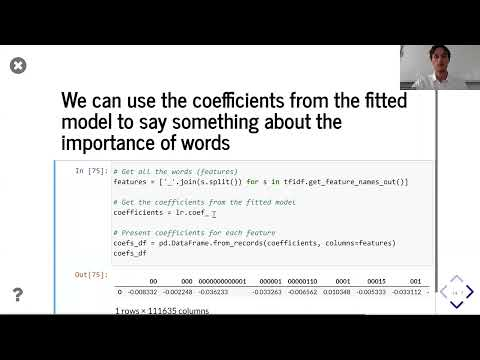

In [9]:
YouTubeVideo('qzSm3rSx2Iw', width=640, height=360)

> **Ex. 14.1.3:** Use the trained logistic regression model from above ("lr_reviews") to predict the sentiment of the tweets.
> - Report testing accuracy

> *Hint:* Use the "tweet_sentiments" list from above to compare the predicted sentiments and the actual sentiments and compute the testing accuracy

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [10]:
### BEGIN SOLUTION
preds = lr_reviews.predict(tweets_bag)
print("Testing accuracy =",np.mean([(preds==tweet_sentiments)]))
### END SOLUTION

Testing accuracy = 0.6471311475409836


> **Ex. 14.1.4:** How well does the logistic regression model from the review data perform in this other domain?
> - Why do you think it does not perform as well?

#### Your answer here
Your answer here

#### Solution
The model performs poorly compared to before: Testing accuracy of 64.7 % compared to 88.4 % in the review data.

Potential reasons:
- There is an unequal distribution of positive and negative examples in the airline dataset (more negative), while in in the review dataset, the distribution was equal
- The terms that were the most important counting towards a positive sentiment in the review dataset, i.e. the ones with high coefficients, are not the ones that are important in the twitter dataset

> **Ex. 14.1.5:** Now train a new logstic regression model on the twitter data:
> 1. Fit a new bag of words on the twitter texts
> 2. Fit a logistic regression model on the twitter bag of words

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [11]:
### BEGIN SOLUTION
# Make our bag of words
tfidf_tweet = TfidfVectorizer()
tweets_new_bag = tfidf_tweet.fit_transform(tweet_df['text'].values)

# Fit the model
lr_tweets = LogisticRegression(random_state=0) #Text classifier
lr_tweets.fit(tweets_new_bag, tweet_sentiments)
### END SOLUTION

LogisticRegression(random_state=0)

> **Ex. 14.1.6:** What are the most important features/words (high and low coefficients) in the new model? 
> - Do they differ from the most important features from the old model?
> - What does this mean for the models' ability to generalize to new data?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [13]:
### BEGIN SOLUTION
# Make our bag of words
tweets_features = ['_'.join(s.split()) for s in tfidf_tweet.get_feature_names_out()]
tweets_coefficients = lr_tweets.coef_
tweets_coefs_df = pd.DataFrame.from_records(tweets_coefficients, columns=tweets_features)

# Most important (positive and negative) features:
print()
print(tweets_coefs_df.T.sort_values(by=[0], ascending=False).head(20))
print()
print(tweets_coefs_df.T.sort_values(by=[0], ascending=True).head(20))
### END SOLUTION


                           0
thank               7.178505
thanks              6.335961
great               4.359550
love                4.037155
awesome             3.623015
amazing             3.488303
worries             3.103664
best                3.101206
kudos               2.521151
hi                  2.242853
good                2.166981
follow              2.104571
excellent           2.099351
destinationdragons  2.097787
appreciate          2.046885
possible            1.836600
know                1.777430
favorite            1.727311
following           1.723798
few                 1.712300

                  0
not       -5.357811
no        -5.138165
delayed   -4.850456
hours     -4.668565
worst     -4.436032
hold      -4.316067
cancelled -3.773514
why       -3.660970
nothing   -3.573728
hour      -3.380091
delay     -3.252315
luggage   -3.248405
your      -3.130182
because   -3.095372
lost      -3.021391
late      -2.982668
stuck     -2.907334
again     -2.837497
rude     

#### Solution
The take-away point is, that the logistic regression model does not generalize well to data from another domain. 

Words that are important for identifying overall sentiment may differ a lot with respect to what the sentiment is directed towards as well as the platform on which it is written, affecting the language people use. 

Therefore, you have to be careful when choosing your data and be aware of potential limitations and biases that follows from your data or from models that are pre-trained. 

Often, training data such as the movie review data is too "clean" and the performance you may achieve with such data is much better than most practical implementations may achieve. For example in real life there is more than just positive and negative sentiment, and the sentiment classes may not be evenly distributed.